## Google Colab Kimlik Doğrulama Adımı

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## GPU Özelliklerinin Görüntülenmesi

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
import tensorflow_hub as hub
print("TF vesion:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF vesion: 2.8.0
Hub version: 0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4895661046808779229
 xla_global_id: -1]

## Verinin Kaggle dan Çekilmesi

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"havvanurezginci","key":"da227079945afcd34ac8669714870345"}'}

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

#compy the kaggle.json to folder created 
!cp kaggle.json ~/.kaggle/

# permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

#to list all datasets in kaggle
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           6766        212  1.0              
surajjha101/stores-area-and-sales-data                                Supermarket store branches sales analysis            10KB  2022-04-29 11:10:16           5861        169  1.0              
devansodariya/student-performance-data                                Student Performance Dataset                           7KB  2022-05-26 13:55:09           2831        120  0.9705882        
paradisejoy/top-hits-spotify-f

In [ ]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k

 99% 1.61G/1.62G [01:00<00:00, 61.7MB/s]
100% 1.62G/1.62G [01:00<00:00, 28.8MB/s]


In [ ]:
!unzip /content/ocular-disease-recognition-odir5k.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: preprocessed_images/2179_left.jpg  
  inflating: preprocessed_images/2179_right.jpg  
  inflating: preprocessed_images/217_left.jpg  
  inflating: preprocessed_images/217_right.jpg  
  inflating: preprocessed_images/2180_left.jpg  
  inflating: preprocessed_images/2180_right.jpg  
  inflating: preprocessed_images/2181_left.jpg  
  inflating: preprocessed_images/2181_right.jpg  
  inflating: preprocessed_images/2182_left.jpg  
  inflating: preprocessed_images/2182_right.jpg  
  inflating: preprocessed_images/2183_left.jpg  
  inflating: preprocessed_images/2183_right.jpg  
  inflating: preprocessed_images/2184_left.jpg  
  inflating: preprocessed_images/2184_right.jpg  
  inflating: preprocessed_images/2185_left.jpg  
  inflating: preprocessed_images/2185_right.jpg  
  inflating: preprocessed_images/2187_left.jpg  
  inflating: preprocessed_images/2187_right.jpg  
  inflating: preprocessed_images/2189_left.jpg  
  inflating: pr

In [ ]:
%cd /gdrive

/gdrive


## Kütüphanelerin kullanılmak üzere içeri aktarılması

In [ ]:
import seaborn as sns
import cv2 #opencv
from collections import Counter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

## CSV dosyasının okunması

In [ ]:
df = pd.read_csv("/content/full_df.csv")
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
df.shape

(6392, 19)

In [ ]:
def has_disease(text):
    if "normal" in text:
      return 0
    elif "cataract"in text:
      return 1
    elif "diabetic retinopathy" in text: 
      return 2
    elif "glaucoma" in text :
      return 3

  

Note, that this image is NOT displayed correctly! Images of eye fundus have reddish tint due to all the blood vessels. The blue tint in this picture comes from the way cv2 reads images by default (Blue Green Red instead of RGB). To fix this:

In [ ]:
df["left_disease"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_disease(x))
df["right_disease"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_disease(x))

In [ ]:
df.head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,left_disease,right_disease
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,1.0,0.0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,0.0,0.0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,NaN,NaN
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,NaN,NaN
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,NaN,NaN
5,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",6_right.jpg,NaN,NaN
6,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",7_right.jpg,NaN,NaN
7,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",8_right.jpg,0.0,0.0
8,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",9_right.jpg,0.0,NaN
9,10,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",10_right.jpg,NaN,0.0


In [ ]:
df.shape

(6392, 21)

In [ ]:
left_normal = df.loc[(df.D==0) & (df.G==0) & (df.C==0) &(df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(670,random_state=42).values

left_cataract = df.loc[(df.C ==1) & (df.left_disease == 1)]["Left-Fundus"].values

left_retinopathy = df.loc[(df.D ==1) & (df.left_disease == 2)]["Left-Fundus"].values

left_glaucoma = df.loc[(df.G ==1) & (df.left_disease == 3)]["Left-Fundus"].values

In [ ]:
right_normal = df.loc[(df.D==0) & (df.G==0) & (df.C==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(670,random_state=42).values
 # df.D==0 & df.G==0 & df.C==0
 # .sample(500,random_state=42)

right_cataract = df.loc[(df.C ==1) & (df.right_disease == 1)]["Right-Fundus"].values

right_retinopathy = df.loc[(df.D ==1) & (df.right_disease == 2)]["Right-Fundus"].values

right_glaucoma = df.loc[(df.G ==1) & (df.right_disease == 3)]["Right-Fundus"].values

In [ ]:
print("Number of images in left normal: {}".format(len(left_normal)))
print("Number of images in right normal: {}".format(len(right_normal)))

print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

print("Number of images in left retinopathy: {}".format(len(left_retinopathy)))
print("Number of images in right retinopathy: {}".format(len(right_retinopathy)))

print("Number of images in left glaucoma: {}".format(len(left_glaucoma)))
print("Number of images in right glaucoma: {}".format(len(right_glaucoma)))

Number of images in left normal: 670
Number of images in right normal: 670
Number of images in left cataract: 304
Number of images in right cataract: 290
Number of images in left retinopathy: 85
Number of images in right retinopathy: 80
Number of images in left glaucoma: 317
Number of images in right glaucoma: 268


In [ ]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)
glaucoma = np.concatenate((left_glaucoma,right_glaucoma),axis=0)
retinopathy = np.concatenate((left_retinopathy,right_retinopathy),axis=0)

# Sınıfların dağılımı

In [ ]:
print(len(normal),len(cataract),len(retinopathy),len(glaucoma))
#print(len(normal),len(cataract),len(glaucoma))

1340 594 165 585


# Görsellerin Okunması

In [ ]:
from keras.preprocessing.image import load_img,img_to_array

dataset_dir = "/content/preprocessed_images"

image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
  
  for img in image_category:
    image_path = os.path.join(dataset_dir,img)
    try:
       image = cv2.imread(image_path)
       img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
       resized_img = cv2.resize(img_rgb,(image_size,image_size))
    except:
      continue
    dataset.append([np.array(resized_img),np.array(label)])
  #random.shuffle(dataset)
    
  return dataset

In [ ]:
dataset = create_dataset(normal,0)
len(dataset)

1340

In [ ]:
dataset = create_dataset(cataract,1)
len(dataset)

1928

In [ ]:
dataset = create_dataset(retinopathy,2)
len(dataset)

2087

In [ ]:
dataset = create_dataset(glaucoma,3)
len(dataset)

2669

In [ ]:
type(dataset)

list

# Verinin gösterilmesi

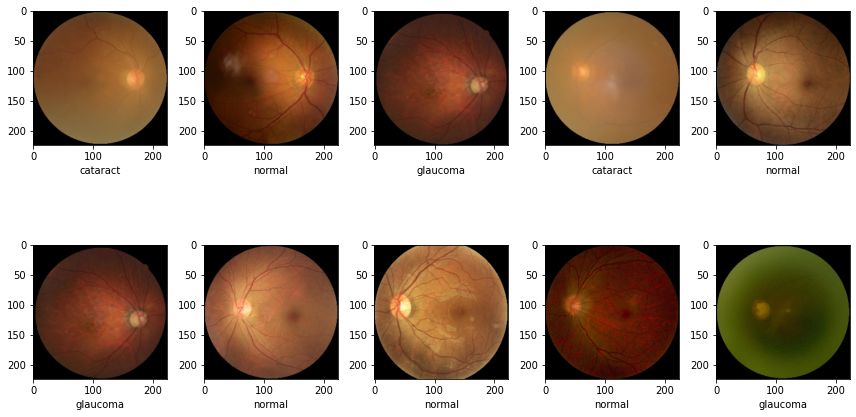

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
      label = "normal"
    elif category ==1:
      label="cataract"
    if category==2:
      label="retinopathy"
    elif category==3:
      label = "glaucoma"

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()   

# Numpy dönüştürme

In [ ]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [ ]:
x.shape

(2669, 224, 224, 3)

In [ ]:
y.shape

(2669,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


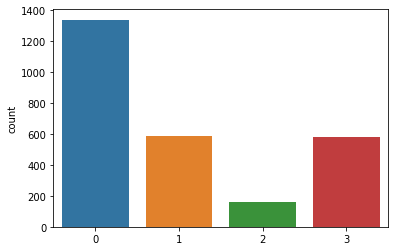

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y)

In [ ]:
len(dataset)

2669

# Eğitim ve Test Veri Kümelerinin Oluşturulması

In [ ]:
testSize = 0.20

In [ ]:
from sklearn.model_selection import train_test_split
import collections #numpy array içeriğini sayma 

def split(images, labels):
    global testSize,test_num,train_num,valid_num
    print("data: ",collections.Counter(labels))
    X_train, X_test, y_train, y_test = train_test_split(images,labels,test_size=testSize,random_state=42)
    
    print("X Training Data :",X_train.shape)
    print("X Testing Data :",X_test.shape)
    
    print("Y Training Data :",y_train.shape," content->",collections.Counter(y_train))
    print("Y Testing Data :",y_test.shape,"  content->",collections.Counter(y_test))
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(x,y)

data:  Counter({0: 1340, 1: 588, 3: 582, 2: 159})
X Training Data : (2135, 224, 224, 3)
X Testing Data : (534, 224, 224, 3)
Y Training Data : (2135,)  content-> Counter({0: 1076, 3: 467, 1: 460, 2: 132})
Y Testing Data : (534,)   content-> Counter({0: 264, 1: 128, 3: 115, 2: 27})


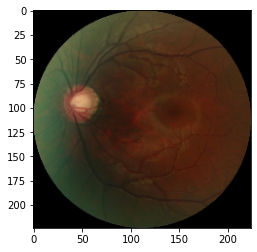

In [ ]:
image=X_train[1]
plt.imshow(image)
plt.show()

In [ ]:
y_train[1]

3

In [ ]:
y_train

array([0, 3, 0, ..., 0, 0, 0])

In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3]
[0 1 2 3]


# Sampling Techniques

##ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
# summarize class distribution
counter = Counter(y_train)
print(counter)
# transform the dataset
ada = ADASYN(sampling_strategy='minority')

train_rows=len(X_train)
X_train = X_train.reshape(train_rows,-1)
print(X_train.shape)


X_train_sampling, y_train_sampling = ada.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train_sampling)
print(counter)

X_train_sampling = X_train_sampling.reshape(-1,224,224,3)
print(X_train_sampling.shape)

Counter({0: 1076, 3: 467, 1: 460, 2: 132})
(2135, 150528)
Counter({2: 1117, 0: 1076, 3: 467, 1: 460})
(3120, 224, 224, 3)


# Verinin Ön İşlenmesi (Preprocessing)
Girişlerin ve etiketlerin hazırlanması

shape,reshape ; görüntünün kanal, yükseklik, genişilk ayarları

In [ ]:
#label ları kategorik hale çevirelim
from tensorflow.keras.utils import to_categorical

def preprocessing_normalization():
  global img_rows,img_cols
  global X_train_sampling,X_test
  
  X_train_sampling = X_train_sampling.reshape((-1,image_size,image_size,3))
  X_train_sampling = X_train_sampling.astype('float32') / 255 #normalize ediyoruz astype ile
  
  X_test = X_test.reshape((-1,image_size,image_size,3))
  X_test = X_test.astype('float32') / 255 

def y_categorical():
  global y_train_sampling,y_test
  y_train_sampling = to_categorical(y_train_sampling)
  y_test = to_categorical(y_test)


In [ ]:
preprocessing_normalization()

In [ ]:
y_categorical()

In [ ]:
print(y_train_sampling.shape)
print(X_train_sampling.shape)
print(X_test.shape)
print(y_test.shape)

(3120, 4)
(3120, 224, 224, 3)
(534, 224, 224, 3)
(534, 4)


In [ ]:
X_test[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
y_test

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

# Verinin Kaydedilmesi

In [ ]:
filepath = r"/gdrive/My Drive/Bitirme_2/OnIslenmisDataSetleri_2/"

def data_save(method_name):
  global filepath
  global X_train_sampling,y_train_sampling,X_test,y_test

  np.save(filepath+r"X_train_{}.npy".format(method_name),X_train_sampling)
  np.save(filepath+"y_train_{}.npy".format(method_name),y_train_sampling)

  np.save(filepath+"X_test.npy",X_test)
  np.save(filepath+"y_test.npy",y_test)

In [ ]:
data_save("adasyn")